# Gaussian Discriminant Analysis from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from src.linear_regression_model import LinearModel
from src.logistic_regression_model import LogisticRegression

## Maximize log likelihood function
To find $\phi$, $\mu_0$ and $\mu_1$, recall the log-likelihood:

\begin{align*}
\ell(\phi, \mu_0, \mu_1, \Sigma) & = \log \prod_{i = 1}^{m} p(x^{(i)}, y^{(i)}; \ \phi, \mu_0, \mu_1, \Sigma) \\
                                 & = \log \prod_{i = 1}^{m} p(x^{(i)} \ \vert \ y^{(i)}; \ \mu_0, \mu_1, \Sigma) \ p(y^{(i)}; \ \phi) \\
                                 & = \log \prod_{i = 1}^{m} \big( p(x^{(i)} \ \vert \ y^{(i)} = 1; \ \mu_0, \mu_1, \Sigma) \ p(y^{(i)} = 1; \ \phi) \big) ^{1 \{ y^{(i)} = 1 \}} \big( p(x^{(i)} \ \vert \ y^{(i)} = 0; \ \mu_0, \mu_1, \Sigma) \ p(y^{(i)} = 0; \ \phi) \big) ^{1 \{ y^{(i)} = 0 \}} \\
                                 
\end{align*}

where $C$ does not contain $\phi$, $\mu_0$ or $\mu_1$.

##### First, we take deriviate of $\ell$ respect to $\phi$

\begin{align*}
    \frac{\partial}{\partial \phi}\ell(\phi, \mu_0, \mu_1, \Sigma) &= \frac{\partial}{\partial \phi} \log \displaystyle \prod_{i = 1}^m \big( p(x^{(i)} \ \vert \ y^{(i)} = 1; \ \mu_0, \mu_1, \Sigma) \ p(y^{(i)} = 1; \ \phi) \big) ^{1 \{ y^{(i)} = 1 \}} \big( p(x^{(i)} \ \vert \ y^{(i)} = 0; \ \mu_0, \mu_1, \Sigma) \ p(y^{(i)} = 0; \ \phi) \big) ^{1 \{ y^{(i)} = 0 \}} \\
    &= \frac{\partial}{\partial \phi} \displaystyle \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} \big( -\frac{1}{2} (x^{(i)} - \mu_1)^T \Sigma^{-1} (x^{(i)} - \mu_1) + \log \phi \big) + \frac{\partial}{\partial \phi} \sum_{i = 1}^{m} 1 \{ y^{(i)} = 0 \} \big( -\frac{1}{2} (x^{(i)} - \mu_0)^T \Sigma^{-1} (x^{(i)} - \mu_0) + \log (1 - \phi) \big) + \frac{\partial}{\partial \phi} C \\
    &= \sum_{i = 1}^m 1 \{ y^{(i)} = 1 \} \frac{1}{\phi} - \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \frac{1}{1 - \phi} \\
    &= \frac{1}{\phi} \sum_{i = 1}^m 1 \{ y^{(i)} = 1 \} - \frac{1}{1 - \phi} \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \\
    &= \frac{1}{\phi} \sum_{i = 1}^m 1 \{ y^{(i)} = 1 \} - \frac{1}{1 - \phi} (m - \sum_{i = 1}^m 1 \{ y^{(i)} = 1 \}) \\
\end{align*}
Set the equation above to 0, we easily get 
\begin{align*}
    \phi = \frac{1}{m} \sum_{i = 1}^m 1 \{ y^{(i)} = 1 \}
\end{align*}

##### Second, we compute gradient respect to $\mu_0$

\begin{align*}
    \nabla_{\mu_0} \ell (\phi, \mu_0, \mu_1, \Sigma) &= \nabla_{\mu_0} \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} \big( -\frac{1}{2} (x^{(i)} - \mu_1)^T \Sigma^{-1} (x^{(i)} - \mu_1) + \log \phi \big) + \sum_{i = 1}^{m} 1 \{ y^{(i)} = 0 \} \big( -\frac{1}{2} (x^{(i)} - \mu_0)^T \Sigma^{-1} (x^{(i)} - \mu_0) + \log (1 - \phi) \big) + C \\
    &= \nabla_{\mu_0} \sum_{i = 1}^{m} 1 \{ y^{(i)} = 0 \} \big( -\frac{1}{2} (x^{(i)} - \mu_0)^T \Sigma^{-1} (x^{(i)} - \mu_0) + \log (1 - \phi) \big) \\
    &= \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \nabla_{\mu_0} \big( -\frac{1}{2} (x^{(i)} - \mu_0)^T \Sigma^{-1} (x^{(i)} - \mu_0) + \log (1 - \phi) \big) \\
    &= \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \nabla_{\mu_0} \big(\mu_0^T \Sigma^{-1} x^{(i)} - \frac{1}{2} \mu_0^T \Sigma^{-1} \mu_0 \big)\\
    &= \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \Sigma^{-1} x^{(i)} - \frac{1}{2} (\mu_0^T \Sigma^{-1} + \mu_0^T \Sigma^{-1})^T \\
    &= \sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} \Sigma^{-1} (x^{(i)} - \mu_0)
\end{align*}


Set the equation above equal to 0, we easily get
\begin{align*}
    \mu_0 = \frac{\sum_{i = 1}^m 1 \{ y^{(i)} = 0 \} x^{(i)}}{\sum_{i = 1}^m 1 \{ y^{(i)} = 0 \}}
\end{align*}
Similarly for $\mu_1$

##### Lastly, we compute the co-variance matrix $\Sigma$  of the distribution
Simplify $\ell$ w.r.t $\Sigma^{-1}$:

\begin{align*}
\ell(\phi, \mu_0, \mu_1, \Sigma) & = - \frac{m}{2} \log \vert \Sigma \vert - \frac{1}{2} \sum_{i = 1}^{m} (x^{(i)} - \mu_{y^{(i)}})^T \Sigma^{-1} (x^{(i)} - \mu_{y^{(i)}}) + C \\
                                 & = \frac{m}{2} \log \vert \Sigma^{-1} \vert - \frac{1}{2} \sum_{i = 1}^{m} \Sigma^{-1} (x^{(i)} - \mu_{y^{(i)}}) (x^{(i)} - \mu_{y^{(i)}})^T + C
\end{align*}

We can derive the same estimate by solving:

\begin{align*}
\frac{\partial}{\partial \Sigma^{-1}} \ell(\phi, \mu_0, \mu_1, \Sigma) & = \frac{m}{2} \Sigma - \frac{1}{2} \sum_{i = 1}^{m} (x^{(i)} - \mu_{y^{(i)}}) (x^{(i)} - \mu_{y^{(i)}})^T \\
\end{align*}

For the last time, set equattion above to 0, and we find the co-variance matrix that maximize the log-likelihood function
\begin{align*}
    \Sigma &= \frac{1}{m} \sum{i = 1}^m (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T \\
    &= \frac{1}{m} R R^T
\end{align*}
, where R is the row matrix about distance of each input with there mean

## Find the parameter $\theta$
We know that if all the assumption is acceptable then the probability will equal to the sigmoid function

\begin{align*}
p(y = 1 \ \vert \ x; \ \phi, \mu_0, \mu_1, \Sigma) & = \frac{p(x\ \vert \ y = 1; \ \mu_0, \mu_1, \Sigma) \ p(y = 1; \ \phi)}{p(x\ \vert \ y = 1; \ \mu_0, \mu_1, \Sigma) \ p(y = 1; \ \phi) + p(x\ \vert \ y = 0; \ \mu_0, \mu_1, \Sigma) \ p(y = 0; \ \phi)} \\
                                                   & = 1 / (1 + \frac{p(x\ \vert \ y = 0; \ \mu_0, \mu_1, \Sigma) \ p(y = 0; \ \phi)}{p(x\ \vert \ y = 1; \ \mu_0, \mu_1, \Sigma) \ p(y = 1; \ \phi)}) \\
                                                   & = 1 / (1 + \exp \big( \frac{1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) - \frac{1}{2} (x - \mu_0)^T \Sigma^{-1} (x - \mu_0) \big) \frac{1 - \phi}{\phi}) \\
                                                   & = 1 / (1 + \exp \big( - \big( (\mu_1 - \mu_0)^T \Sigma^{-1} x + (\frac{1}{2} \mu_0^T \Sigma^{-1} \mu_0 - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 - \log \frac{1 - \phi}{\phi}) \big) \big) ) \\
                                                   & = 1 / (1 + \exp \big( -(\theta^T x + \theta_0) \big))
\end{align*}

where $\theta = \Sigma^{-1} (\mu_1 - \mu_0)$ and $\theta_0 = \frac{1}{2} \mu_0^T \Sigma^{-1} \mu_0 - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 - \log \frac{1 - \phi}{\phi}$.

## Implement

In [2]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        m, n = x.shape

        phi = np.sum(y) / m
        mu_0 = np.dot(x.T, 1 - y) / np.sum(1 - y)
        mu_1 = np.dot(x.T, y) / np.sum(y)

        # Reshape y to compute pairwise product with mu
        y_reshaped = np.reshape(y, (m, -1))

        # Matrix comprises mu_0 and mu_1 based on the value of y. Shape(m, n)
        mu_x = y_reshaped * mu_1 + (1 - y_reshaped) * mu_0

        x_centered = x - mu_x

        sigma = np.dot(x_centered.T, x_centered) / m
        sigma_inv = np.linalg.inv(sigma)

        # Compute theta and theta_0 according to the conclusion from part (c)
        theta = np.dot(sigma_inv, mu_1 - mu_0)
        theta_0 = 1 / 2 * mu_0 @ sigma_inv @ mu_0 - 1 / 2 * mu_1 @ sigma_inv @ mu_1 - np.log((1 - phi) / phi)

        self.theta = np.insert(theta, 0, theta_0)

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        # Add x_0 = 1 convention to make predictions using theta^T x >= 0
        return util.add_intercept(x) @ self.theta >= 0

In [3]:
ds1_train_path = 'data/ds1_train.csv'
ds1_valid_path = 'data/ds1_valid.csv'
ds2_train_path = 'data/ds2_train.csv'
ds2_valid_path = 'data/ds2_valid.csv'

In [4]:
x1_train, y1_train = util.load_dataset(ds1_train_path)
x1_valid, y1_valid = util.load_dataset(ds1_valid_path)

x2_train, y2_train = util.load_dataset(ds2_train_path)
x2_valid, y2_valid = util.load_dataset(ds2_valid_path)

Let's take a look about this two dataset

In [5]:
def plt_dataset(x, y): 
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    
    plt.show()
    plt.close()

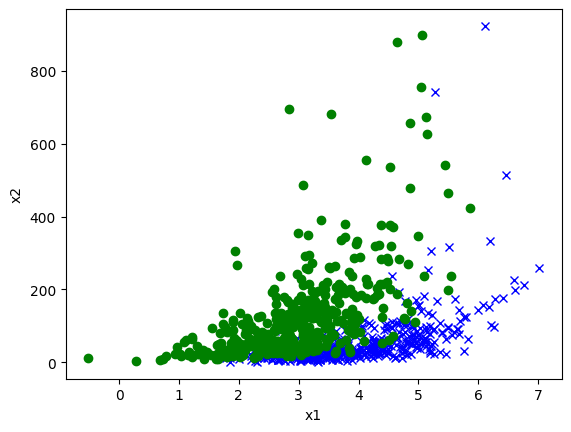

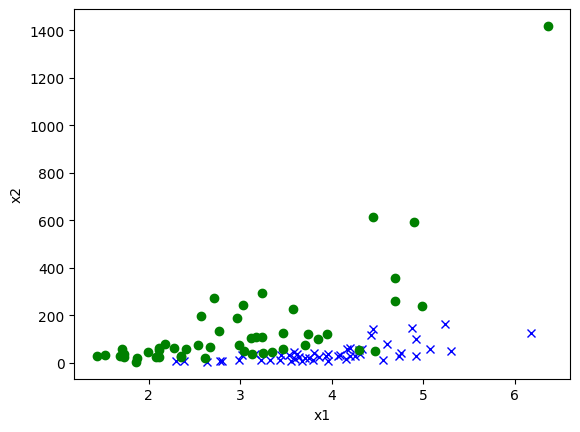

In [6]:
# Dataset 1
plt_dataset(x1_train, y1_train)
plt_dataset(x1_valid, y1_valid)

We can see that, x2 is non-Gaussian distribution (skewed close to 0)

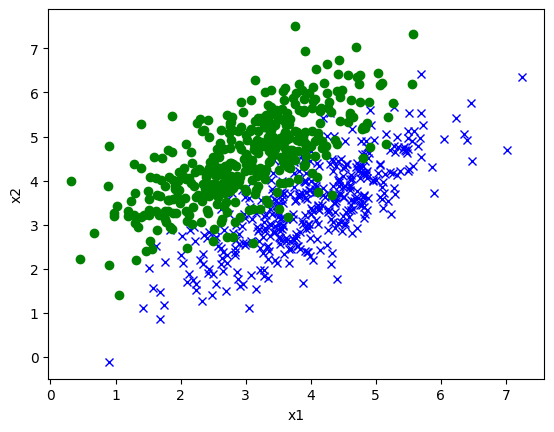

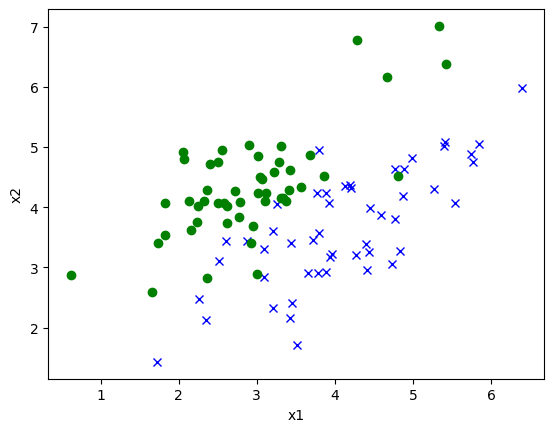

In [7]:
plt_dataset(x2_train, y2_train)
plt_dataset(x2_valid, y2_valid)

In this dataset, we see that x1 and x2 is merely 'good' for the assumption of GDA

### Let's try to fit our GDA model to two dataset and watch it behave

In [10]:
gda1_model = GDA()
gda2_model = GDA()

gda1_model.fit(x1_train, y1_train)
gda2_model.fit(x2_train, y2_train)

In [11]:
log1_model = LogisticRegression()
log1_model.fit(
    x= util.add_intercept(x1_train),
    y= y1_train,
)

log2_model = LogisticRegression()
log2_model.fit(
    x= util.add_intercept(x2_train),
    y= y2_train
)

Train: ----------100%----------
Train: ----------100%----------


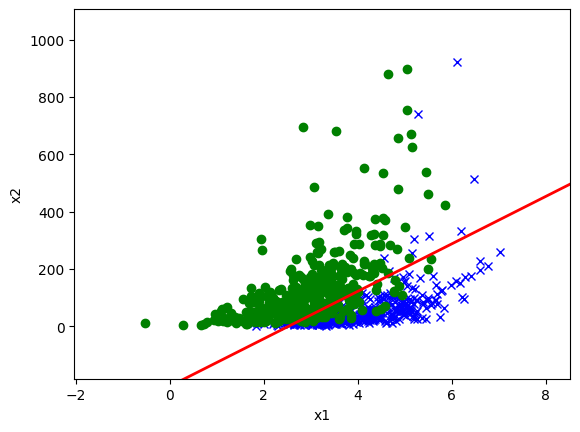

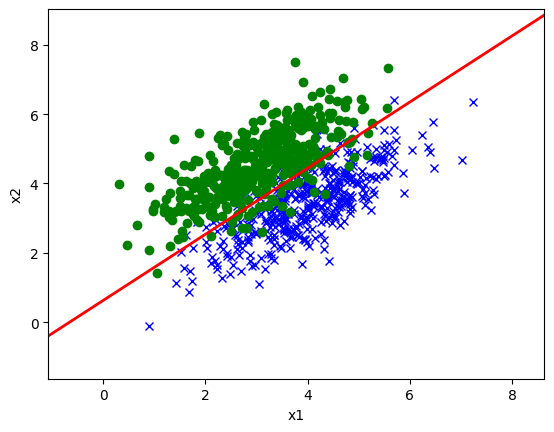

In [12]:
util.plot(x1_train, y1_train, log1_model.theta)
util.plot(x2_train, y2_train, log2_model.theta)

With dataset 1, GDA behave poorly. To prove it poorly, let's compare it with Logistic Regression Model

In [13]:
def plt_compare(x, y, theta_1, theta_2, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta_2[0] / theta_2[2] * correction + theta_2[1] / theta_2[2] * x1)
    plt.plot(x1, x2, c='blue', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)


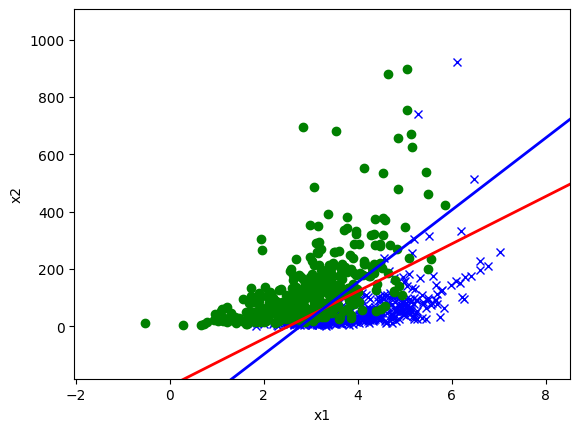

In [14]:
plt_compare(
    x= x1_train,
    y= y1_train,
    theta_1 = log1_model.theta, # Red line
    theta_2 = gda1_model.theta # Blue line
)

We see that the optimal line (red line) and 

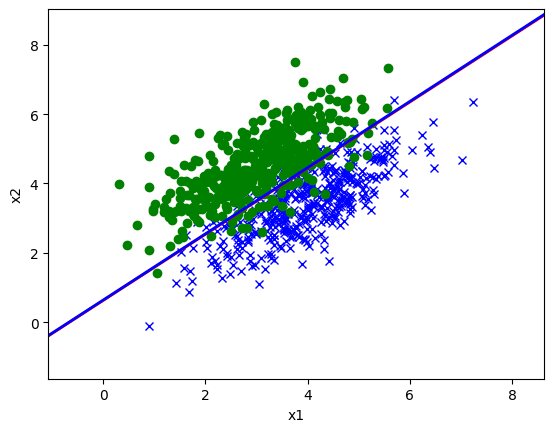

In [15]:
plt_compare(
    x= x2_train,
    y= y2_train,
    theta_1 = log2_model.theta, # Red line
    theta_2 = gda2_model.theta # Blue line
)

We notice that x2 is positive with ds1 so we will you the log transformation to reduce the variance the data. And plot it to see that new 'x2' is gaussion distribution or not.

In [19]:
def log_transform(column):
    return np.log(column)

In [20]:
print(f"Before Transformation: {x1_train[:, -1]}")
x1_train[:, -1] = log_transform(x1_train[:, -1])
print(f"After Transformation: {x1_train[:, -1]}")
x1_valid[:, -1] = log_transform(x1_valid[:, -1])

Before Transformation: [ 60.35961272 344.1492843  178.22208681  15.25947155  66.19417399
  41.67766519 143.27558992  35.96990594  29.56907921  76.63672138
 107.38296323 148.95788196  79.24692536  63.01109005  19.77567822
  84.14172897  55.74518237 142.49950489  48.2333977   24.36272067
 174.93243256   9.14972882  31.14217714 535.53423     31.90797949
  90.13742445  35.68206672 331.56104594 285.58377326  43.35654947
  21.7029483  121.14752847  19.52623875  61.55081046 119.78524864
 101.36603778  18.1395687   36.64247789 116.56584059 171.00790582
  94.58892754 655.80875121 215.99377455 354.08869909 270.86375508
  60.39310014  84.74997409 150.19837885   4.02785555 139.04481985
  29.94753498  29.46943655  78.22199695  24.66488158  31.5005132
  25.6878564  128.52910189 195.04023294  18.31343318  80.58094528
 166.67933002  20.01877799  48.8041074   53.09805238  66.92850269
 206.98044665 122.11709918 159.08617473 114.5803979  171.77995674
  50.23591961  65.10805375 229.59281869  57.66087165 1

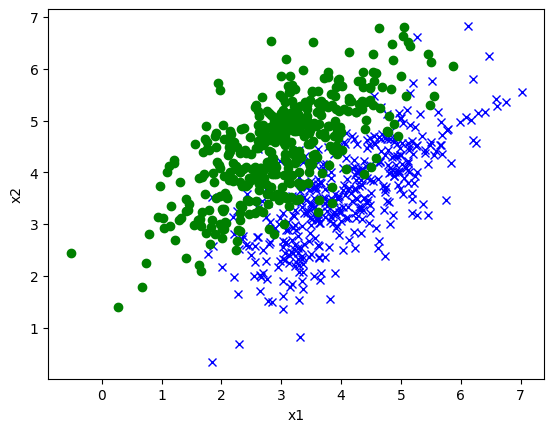

In [21]:
plt_dataset(x1_train, y1_train)

After taking log transformation, x2 is 'good' for gaussian distribution assumption

Now, let's try again to compare logistic model with GDA in this new dataset

In [22]:
log_model = LogisticRegression()
gda_model = GDA()

log_model.fit(
    x= util.add_intercept(x1_train),
    y= y1_train
)
gda_model.fit(
    x= x1_train,
    y= y1_train
)

Train: ----------100%----------


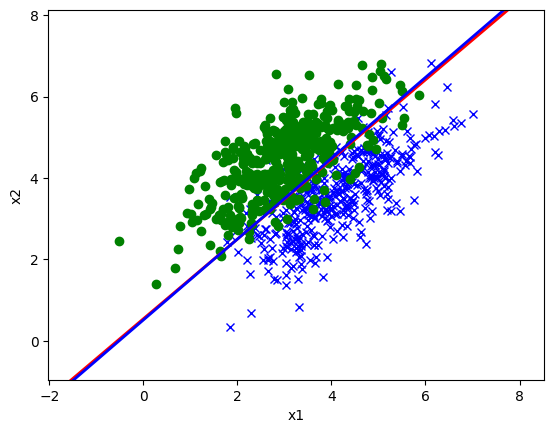

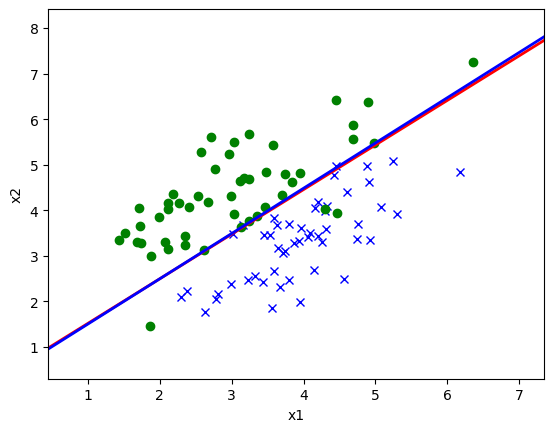

In [24]:
plt_compare(
    x= x1_train,
    y= y1_train,
    theta_1= log_model.theta,
    theta_2= gda_model.theta
)
plt_compare(
    x= x1_valid,
    y= y1_valid,
    theta_1= log_model.theta,
    theta_2= gda_model.theta
)

After transformation, GDA behave well